In [ ]:
# @title Import Library
import os
import numpy as np
import pandas as pd
import ast
import json
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
from scipy.stats import loguniform, uniform
from scipy.stats import randint
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb

In [ ]:
# @title Mount Drive and Path Configuration
from google.colab import drive
drive.mount('/content/drive/')

project_path = "/content/drive/MyDrive/Project/PBI Home Credit Indonesia-Data Scientist Intern"
data_path = f"{project_path}/Datasets"
output_path = f"{project_path}/Outputs/EDA Outputs"
eda_output_path = f"{project_path}/Outputs/EDA Outputs"
preproc_output_path = f"{project_path}/Outputs/Preprocessing Outputs"
model_output_path = f"{project_path}/Outputs/Modeling Outputs"
os.makedirs(model_output_path, exist_ok=True)

Mounted at /content/drive/


In [ ]:
# @title Load Dataset (Scaled for LR)
train = pd.read_csv(f"{preproc_output_path}/train_selected_scaled.csv")
test  = pd.read_csv(f"{preproc_output_path}/test_selected_scaled.csv")
print("Train shape:", train.shape)
display(train.head())
print("Test  shape:", test.shape)
display(test.head())

Train shape: (307511, 150)


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,OCCUPATION_TYPE_Sales staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Self-employed,TARGET
0,-0.577538,0.142129,-0.478095,-0.166143,-0.507236,-0.149452,1.506880,-0.456215,0.379837,0.579154,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
1,-0.577538,0.426792,1.725450,0.592683,1.600873,-1.252750,-0.166821,-0.460115,1.078697,1.790855,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-0.577538,-0.427196,-1.152888,-1.404669,-1.092145,-0.783451,-0.689509,-0.453299,0.206116,0.306869,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-0.577538,-0.142533,-0.711430,0.177874,-0.653463,-0.928991,-0.680114,-0.473217,-1.375829,0.369143,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
4,-0.577538,-0.199466,-0.213734,-0.361749,-0.068554,0.563570,-0.892535,-0.473210,0.191639,-0.307263,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


Test  shape: (48744, 149)


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Sales staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Self-employed
0,-0.577538,-0.142533,-0.075097,-0.451790,-0.239153,-0.145910,-0.734193,-0.468192,-0.052196,1.445696,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.577538,-0.294354,-0.934825,-0.671924,-0.970289,1.078997,-0.464485,-0.483339,-1.172870,0.908413,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.577538,0.142129,0.159601,2.943988,0.248271,-0.127762,-0.916824,-0.483262,0.797961,-0.337075,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.192084,0.616567,2.424840,1.511720,2.807247,0.399377,0.472274,-0.464915,0.847636,-0.804133,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.807273,0.047242,0.065776,0.342121,0.236086,-0.783451,0.686757,-0.467215,0.279919,-0.839908,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# @title Separate Features & Target
target_col = "TARGET"
X_train = train.drop(columns=[target_col])
y_train = train[target_col]
X_test  = test.copy()
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test :", X_test.shape)

X_train: (307511, 149) y_train: (307511,)
X_test : (48744, 149)


In [ ]:
# @title Split Train and Validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)
print("Train split:", X_tr.shape, "Validation split:", X_val.shape)

X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=0.3, stratify=y_train, random_state=42)
print("Sample untuk tuning:", X_sample.shape)

Train split: (246008, 149) Validation split: (61503, 149)
Sample untuk tuning: (92253, 149)


# Logistic Regression

In [ ]:
# @title Hyperparameter Tuning
# Hyperparameter
param_dist_lr = {"penalty": ["l1", "l2", "elasticnet"],
                 "C": loguniform(1e-3, 1e3),
                 "l1_ratio": uniform(0, 1),
                 "class_weight": [None, "balanced"],
                 "max_iter": [1000],
                 "tol": [1e-3]}
lr = LogisticRegression(random_state=42, n_jobs=-1, solver="saga")

# RandomizedSearchCV
rand_lr = RandomizedSearchCV(estimator=lr,
                              param_distributions=param_dist_lr,
                              n_iter=30,
                              scoring="roc_auc",
                              cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
                              n_jobs=-1,
                              verbose=1,
                              random_state=42)

rand_lr.fit(X_sample, y_sample)

# Save tuning results
cv_results_lr = pd.DataFrame(rand_lr.cv_results_)
cv_results_lr.to_csv(f"{model_output_path}/lr_randomsearch_results.csv", index=False)

best_params_lr = rand_lr.best_params_
best_score_lr = rand_lr.best_score_
pd.DataFrame([{"best_params": best_params_lr,
               "best_cv_roc_auc": best_score_lr}]
             ).to_csv(f"{model_output_path}/lr_best_params.csv", index=False)

print("✅ Hyperparameter tuning selesai")
print("✅ Best Params:", best_params_lr)
print("✅ Best CV ROC-AUC:", best_score_lr)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


✅ Hyperparameter tuning selesai
✅ Best Params: {'C': np.float64(0.06690421166498801), 'class_weight': 'balanced', 'l1_ratio': np.float64(0.007066305219717406), 'max_iter': 1000, 'penalty': 'l1', 'tol': 0.001}
✅ Best CV ROC-AUC: 0.7552266480156865


In [ ]:
# @title Train Final Logistic Regression dengan Best Params
best_params_df = pd.read_csv(f"{model_output_path}/lr_best_params.csv")
raw_params = best_params_df["best_params"].iloc[0]
best_score_lr = best_params_df["best_cv_roc_auc"].iloc[0]

try:
    best_params_lr = json.loads(raw_params.replace("'", '"'))
except Exception:
    best_params_lr = eval(raw_params, {"np": np})
best_params_lr = {k: float(v) if isinstance(v, (np.floating,)) else v
                  for k, v in best_params_lr.items()}
print("✅ Loaded Best Params:", best_params_lr)
print("✅ Best CV ROC-AUC:", best_score_lr)

final_lr = LogisticRegression(**best_params_lr, random_state=42, n_jobs=-1,  solver="saga")
final_lr.fit(X_train, y_train)
print("✅ Final model dilatih dengan seluruh training data")

✅ Loaded Best Params: {'C': 0.06690421166498801, 'class_weight': 'balanced', 'l1_ratio': 0.007066305219717406, 'max_iter': 1000, 'penalty': 'l1', 'tol': 0.001}
✅ Best CV ROC-AUC: 0.7552266480156865


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


✅ Final model dilatih dengan seluruh training data


In [ ]:
# @title Save Model Logistic Regression
import joblib
model_path = f"{model_output_path}/final_lr_model.pkl"
joblib.dump(final_lr, model_path)
print(f"✅ Model Logistic Regression disimpan ke: {model_path}")

✅ Model Logistic Regression disimpan ke: /content/drive/MyDrive/Project/PBI Home Credit Indonesia-Data Scientist Intern/Outputs/Modeling Outputs/final_lr_model.pkl


In [ ]:
# @title Evaluation Metrics
# Prediksi
y_val_pred_proba = final_lr.predict_proba(X_val)[:, 1]
y_val_pred = final_lr.predict(X_val)

# Hitung metric
roc_auc = roc_auc_score(y_val, y_val_pred_proba)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Tampilkan
print("✅ Evaluation Metrics Logistic Regression")
print(f"ROC-AUC   : {roc_auc:.4f}")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

# Optional: laporan lengkap
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred, digits=4))

✅ Evaluation Metrics Logistic Regression
ROC-AUC   : 0.7654
Accuracy  : 0.7028
Precision : 0.1697
Recall    : 0.6892
F1 Score  : 0.2724

Classification Report:
              precision    recall  f1-score   support

           0     0.9627    0.7040    0.8132     56538
           1     0.1697    0.6892    0.2724      4965

    accuracy                         0.7028     61503
   macro avg     0.5662    0.6966    0.5428     61503
weighted avg     0.8987    0.7028    0.7696     61503



In [ ]:
# @title Predict Data Test
# Ambil SK_ID_CURR dari dataset train_merged dan test_merged
train_path = f"{eda_output_path}/train_merged.csv"
test_path  = f"{eda_output_path}/test_merged.csv"
train_raw = pd.read_csv(train_path)
test_raw  = pd.read_csv(test_path)
test_ids = test_raw["SK_ID_CURR"]

# Predict Data Test
test_pred_proba = final_lr.predict_proba(X_test)[:, 1]
submission = pd.DataFrame({"SK_ID_CURR": test_ids,
                           "TARGET_PROBA": test_pred_proba})
submission.to_csv(f"{model_output_path}/lr_test_predictions.csv", index=False)
print(f"✅ Prediksi test set disimpan ke: {model_output_path}/lr_test_predictions.csv")
display(submission.head())

✅ Prediksi test set disimpan ke: /content/drive/MyDrive/Project/PBI Home Credit Indonesia-Data Scientist Intern/Outputs/Modeling Outputs/lr_test_predictions.csv


,SK_ID_CURR,TARGET_PROBA
0,100001,0.384805
1,100005,0.736084
2,100013,0.190477
3,100028,0.215976
4,100038,0.667755


In [ ]:
# @title Load Dataset (NoScale for RF and LightGBM)
train = pd.read_csv(f"{preproc_output_path}/train_selected_noscale.csv")
test  = pd.read_csv(f"{preproc_output_path}/test_selected_noscale.csv")
print("Train shape:", train.shape)
display(train.head())
print("Test  shape:", test.shape)
display(test.head())

Train shape: (307511, 150)


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,OCCUPATION_TYPE_Sales staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Self-employed,TARGET
0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
1,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
4,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


Test  shape: (48744, 149)


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Sales staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Self-employed
0,0.0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241.0,-2329.0,-5170.0,-812.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064.0,-4469.0,-9118.0,-1623.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038.0,-4458.0,-2175.0,-3503.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976.0,-1866.0,-2000.0,-4208.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,180000.0,625500.0,32067.0,625500.0,0.010032,-13040.0,-2191.0,-4000.0,-4262.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# @title Separate Features & Target
target_col = "TARGET"
X_train = train.drop(columns=[target_col])
y_train = train[target_col]
X_test  = test.copy()
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test :", X_test.shape)

X_train: (307511, 149) y_train: (307511,)
X_test : (48744, 149)


In [ ]:
# @title Split Train and Validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)
print("Train split:", X_tr.shape, "Validation split:", X_val.shape)

X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=0.3, stratify=y_train, random_state=42)
print("Sample untuk tuning:", X_sample.shape)

Train split: (246008, 149) Validation split: (61503, 149)
Sample untuk tuning: (92253, 149)


# Random Forest

In [ ]:
# @title Hyperparameter Tuning RF
param_dist_rf = {"n_estimators": randint(100,200),
                 "max_depth": randint(5, 10),
                 "min_samples_split": [5, 10],
                 "min_samples_leaf": [2, 4],
                 "max_features": ["sqrt"],
                 "class_weight": ["balanced"]}
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rand_rf = RandomizedSearchCV(estimator=rf,
                             param_distributions=param_dist_rf,
                             n_iter=30,
                             scoring="roc_auc",
                             cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
                             n_jobs=-1,
                             verbose=1,
                             random_state=42)
rand_rf.fit(X_sample, y_sample)

# Simpan hasil tuning lengkap (urut terbaik dulu)
cv_results_rf = pd.DataFrame(rand_rf.cv_results_)
cv_results_rf = cv_results_rf.sort_values("rank_test_score", ascending=True)
cv_results_rf.to_csv(f"{model_output_path}/rf_randomsearch_results.csv", index=False)

# Simpan best params + best score ke JSON
best_params_rf = rand_rf.best_params_
best_score_rf = rand_rf.best_score_
with open(f"{model_output_path}/rf_best_params.json", "w") as f:
    json.dump({"best_params": best_params_rf,
               "best_cv_roc_auc": best_score_rf}, f)

print("✅ Hyperparameter tuning selesai")
print("✅ Best Params:", best_params_rf)
print("✅ Best CV ROC-AUC:", best_score_rf)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
✅ Hyperparameter tuning selesai
✅ Best Params: {'class_weight': 'balanced', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 199}
✅ Best CV ROC-AUC: 0.7438043321243663


In [ ]:
# @title Train Final RF with Best Params
with open(f"{model_output_path}/rf_best_params.json", "r") as f:
    best_data_rf = json.load(f)
best_params_rf = best_data_rf["best_params"]
best_score_rf  = best_data_rf["best_cv_roc_auc"]
print("✅ Loaded Best Params:", best_params_rf)
print("✅ Best CV ROC-AUC:", best_score_rf)

final_rf = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1)
final_rf.fit(X_train, y_train)
print("✅ Final model RF dilatih dengan seluruh training data")

# Simpan final model
model_path = f"{model_output_path}/final_rf_model.pkl"
joblib.dump(final_rf, model_path)
print(f"✅ Model Random Forest disimpan ke: {model_path}")

✅ Loaded Best Params: {'class_weight': 'balanced', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 199}
✅ Best CV ROC-AUC: 0.7438043321243663
✅ Final model RF dilatih dengan seluruh training data
✅ Model Random Forest disimpan ke: /content/drive/MyDrive/Project/PBI Home Credit Indonesia-Data Scientist Intern/Outputs/Modeling Outputs/final_rf_model.pkl


In [ ]:
# @title Evaluation Metrics Random Forest
# Predict
y_val_pred_proba_rf = final_rf.predict_proba(X_val)[:, 1]
y_val_pred_rf = final_rf.predict(X_val)

# Hitung metrics
roc_auc_rf = roc_auc_score(y_val, y_val_pred_proba_rf)
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
precision_rf = precision_score(y_val, y_val_pred_rf)
recall_rf = recall_score(y_val, y_val_pred_rf)
f1_rf = f1_score(y_val, y_val_pred_rf)

# Tampilkan
print("\n✅ Evaluation Metrics Random Forest")
print(f"ROC-AUC   : {roc_auc_rf:.4f}")
print(f"Accuracy  : {accuracy_rf:.4f}")
print(f"Precision : {precision_rf:.4f}")
print(f"Recall    : {recall_rf:.4f}")
print(f"F1 Score  : {f1_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_rf, digits=4))


✅ Evaluation Metrics Random Forest
ROC-AUC   : 0.7745
Accuracy  : 0.7118
Precision : 0.1770
Recall    : 0.7041
F1 Score  : 0.2829

Classification Report:
              precision    recall  f1-score   support

           0     0.9648    0.7124    0.8196     56538
           1     0.1770    0.7041    0.2829      4965

    accuracy                         0.7118     61503
   macro avg     0.5709    0.7083    0.5512     61503
weighted avg     0.9012    0.7118    0.7763     61503



In [ ]:
# @title Predict Data Test
# Ambil SK_ID_CURR dari dataset train_merged dan test_merged
train_path = f"{eda_output_path}/train_merged.csv"
test_path  = f"{eda_output_path}/test_merged.csv"
train_raw = pd.read_csv(train_path)
test_raw  = pd.read_csv(test_path)
test_ids = test_raw["SK_ID_CURR"]

# Predict Data Test
test_pred_proba_rf = final_rf.predict_proba(X_test)[:, 1]
submission_rf = pd.DataFrame({"SK_ID_CURR": test_ids,
                           "TARGET_PROBA": test_pred_proba_rf})
submission_rf.to_csv(f"{model_output_path}/rf_test_predictions.csv", index=False)
print(f"✅ Prediksi test set disimpan ke: {model_output_path}/rf_test_predictions.csv")
display(submission_rf.head())

✅ Prediksi test set disimpan ke: /content/drive/MyDrive/Project/PBI Home Credit Indonesia-Data Scientist Intern/Outputs/Modeling Outputs/rf_test_predictions.csv


,SK_ID_CURR,TARGET_PROBA
0,100001,0.456273
1,100005,0.575274
2,100013,0.365366
3,100028,0.364533
4,100038,0.603483


# LightGBM

In [ ]:
# @title Hyperparameter Tuning LightGBM
param_dist_lgb = {"num_leaves": [31, 63, 95],
                  "max_depth": [-1, 10, 20],
                  "learning_rate": [0.01, 0.1],
                  "n_estimators": [800],
                  "subsample": [0.8, 1.0],
                  "colsample_bytree": [0.8, 1.0],
                  "min_child_samples": [20, 50, 80]}

lgb_estimator = lgb.LGBMClassifier(random_state=42,
                                   n_jobs=-1,
                                   objective="binary",
                                   boosting_type="gbdt")

# RandomizedSearchCV
rand_lgb = RandomizedSearchCV(estimator=lgb_estimator,
                              param_distributions=param_dist_lgb,
                              n_iter=30,
                              scoring="roc_auc",
                              cv=3,
                              n_jobs=-1,
                              verbose=1,
                              random_state=42)

rand_lgb.fit(X_sample, y_sample)

# Simpan hasil tuning lengkap (urut terbaik dulu)
cv_results_lgb = pd.DataFrame(rand_lgb.cv_results_)
cv_results_lgb = cv_results_lgb.sort_values("rank_test_score", ascending=True)
cv_results_lgb.to_csv(f"{model_output_path}/lgb_randomsearch_results.csv", index=False)

# Simpan best params + best score ke JSON
best_params_lgb = rand_lgb.best_params_
best_score_lgb = rand_lgb.best_score_
with open(f"{model_output_path}/lgb_best_params.json", "w") as f:
    json.dump({"best_params": best_params_lgb,
               "best_cv_roc_auc": best_score_lgb}, f)

print("✅ Hyperparameter tuning selesai")
print("✅ Best Params:", best_params_lgb)
print("✅ Best CV ROC-AUC:", best_score_lgb)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7447, number of negative: 84806
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21365
[LightGBM] [Info] Number of data points in the train set: 92253, number of used features: 149
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080724 -> initscore=-2.432555
[LightGBM] [Info] Start training from score -2.432555
✅ Hyperparameter tuning selesai
✅ Best Params: {'subsample': 1.0, 'num_leaves': 63, 'n_estimators': 800, 'min_child_samples': 80, 'max_depth': -1, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
✅ Best CV ROC-AUC: 0.7650233124251069


In [ ]:
# @title Train Final LightGBM with Best Params
with open(f"{model_output_path}/lgb_best_params.json", "r") as f:
    best_data_lgb = json.load(f)
best_params_lgb = best_data_lgb["best_params"]
best_score_lgb  = best_data_lgb["best_cv_roc_auc"]
print("✅ Loaded Best Params:", best_params_lgb)
print("✅ Best CV ROC-AUC:", best_score_lgb)

# Hitung scale_pos_weight untuk imbalance handling
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print("✅ scale_pos_weight:", scale_pos_weight)

final_lgb = lgb.LGBMClassifier(**best_params_lgb,
                               random_state=42,
                               n_jobs=-1,
                               objective="binary",
                               boosting_type="gbdt",
                               scale_pos_weight=scale_pos_weight)
final_lgb.fit(X_train, y_train)
print("✅ Final model LightGBM dilatih dengan seluruh training data")

# Simpan final model
model_path = f"{model_output_path}/final_lgb_model.pkl"
joblib.dump(final_lgb, model_path)
print(f"✅ Model LightGBM disimpan ke: {model_path}")

✅ Loaded Best Params: {'subsample': 1.0, 'num_leaves': 63, 'n_estimators': 800, 'min_child_samples': 80, 'max_depth': -1, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
✅ Best CV ROC-AUC: 0.7650233124251069
✅ scale_pos_weight: 11.387150050352467
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 24825, number of negative: 282686
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.419007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21617
[LightGBM] [Info] Number of data points in the train set: 307511, number of used features: 149
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432486
[LightGBM] [Info] Start training from score -2.432486
✅ Final model LightGBM dilatih dengan seluruh training data
✅ Model LightGBM disimpan ke: /content/drive/MyDriv

In [ ]:
# @title Evaluation Metrics LightGBM
# Predict
y_val_pred_proba_lgb = final_lgb.predict_proba(X_val)[:, 1]

# Cari threshold optimal (maximize F1)
prec, rec, thresh = precision_recall_curve(y_val, y_val_pred_proba_lgb)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-9)
best_idx = np.argmax(f1_scores)
best_threshold = thresh[best_idx]
print("\n✅ Best Threshold (maximize F1):", best_threshold)

# Prediksi class dengan threshold optimal
y_val_pred_lgb = (y_val_pred_proba_lgb >= best_threshold).astype(int)

# Hitung metrics
roc_auc_lgb = roc_auc_score(y_val, y_val_pred_proba_lgb)
accuracy_lgb = accuracy_score(y_val, y_val_pred_lgb)
precision_lgb = precision_score(y_val, y_val_pred_lgb)
recall_lgb = recall_score(y_val, y_val_pred_lgb)
f1_lgb = f1_score(y_val, y_val_pred_lgb)

# Tampilkan hasil
print("\n✅ Evaluation Metrics LightGBM")
print(f"ROC-AUC   : {roc_auc_lgb:.4f}")
print(f"Accuracy  : {accuracy_lgb:.4f}")
print(f"Precision : {precision_lgb:.4f}")
print(f"Recall    : {recall_lgb:.4f}")
print(f"F1 Score  : {f1_lgb:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_lgb, digits=4))


✅ Best Threshold (maximize F1): 0.7018525318291002

✅ Evaluation Metrics LightGBM
ROC-AUC   : 0.8393
Accuracy  : 0.8889
Precision : 0.3509
Recall    : 0.4419
F1 Score  : 0.3912

Classification Report:
              precision    recall  f1-score   support

           0     0.9498    0.9282    0.9389     56538
           1     0.3509    0.4419    0.3912      4965

    accuracy                         0.8889     61503
   macro avg     0.6504    0.6851    0.6650     61503
weighted avg     0.9015    0.8889    0.8947     61503



In [ ]:
# @title Predict Data Test LightGBM
# Ambil SK_ID_CURR dari dataset train_merged dan test_merged
train_path = f"{eda_output_path}/train_merged.csv"
test_path  = f"{eda_output_path}/test_merged.csv"
train_raw = pd.read_csv(train_path)
test_raw  = pd.read_csv(test_path)
test_ids = test_raw["SK_ID_CURR"]

# Predict Data Test dengan LightGBM
test_pred_proba_lgb = final_lgb.predict_proba(X_test)[:, 1]
submission_lgb = pd.DataFrame({"SK_ID_CURR": test_ids,
                               "TARGET_PROBA": test_pred_proba_lgb})
submission_lgb.to_csv(f"{model_output_path}/lgb_test_predictions.csv", index=False)
print(f"✅ Prediksi test set LightGBM disimpan ke: {model_output_path}/lgb_test_predictions.csv")
display(submission_lgb.head())

✅ Prediksi test set LightGBM disimpan ke: /content/drive/MyDrive/Project/PBI Home Credit Indonesia-Data Scientist Intern/Outputs/Modeling Outputs/lgb_test_predictions.csv


,SK_ID_CURR,TARGET_PROBA
0,100001,0.302888
1,100005,0.632008
2,100013,0.166083
3,100028,0.200127
4,100038,0.718505


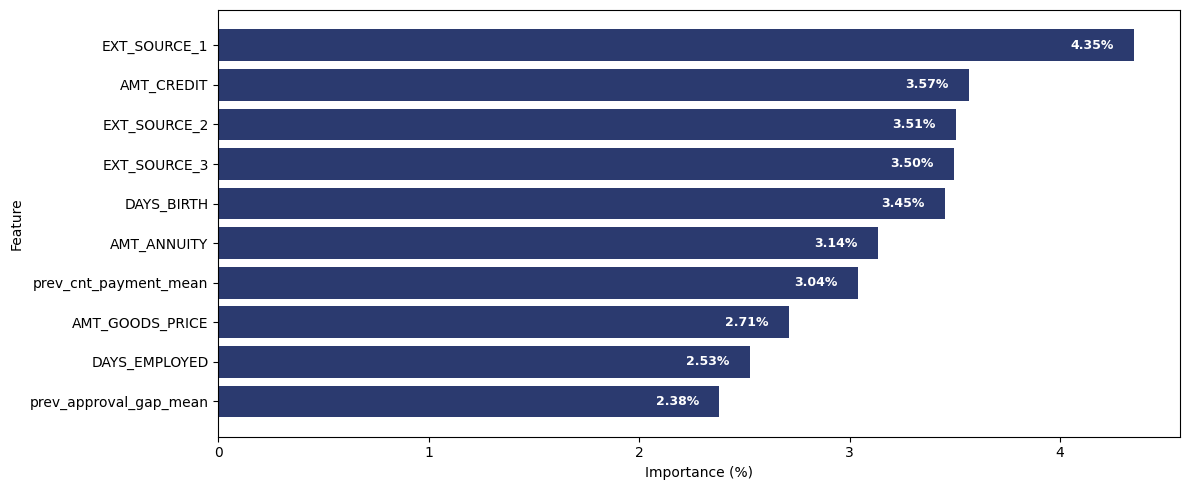

In [ ]:
# @title Feature Importance LightGBM (Top 10)
importances = final_lgb.feature_importances_
features = X_train.columns
feat_imp_lgb = pd.DataFrame({"feature": features, "importance": importances})
feat_imp_lgb["importance_pct"] = feat_imp_lgb["importance"] / feat_imp_lgb["importance"].sum() * 100
top_n = 10
feat_plot = feat_imp_lgb.sort_values("importance", ascending=False).head(top_n)
feat_plot = feat_plot.sort_values("importance", ascending=True)

# Bar chart
custom_color = (43/255, 58/255, 111/255)
fig, ax = plt.subplots(figsize=(12, 5), facecolor="none")
ax.set_facecolor("none")
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
bars = plt.barh(feat_plot["feature"], feat_plot["importance_pct"], color=custom_color)
for bar, val in zip(bars, feat_plot["importance_pct"]):
    plt.text(bar.get_width() - 0.2,
             bar.get_y() + bar.get_height()/2,
             f"{val:.2f}%",
             ha='center', va='center',
             fontsize=9, color="white", fontweight="bold")

ax.set_xlabel("Importance (%)")
ax.set_ylabel("Feature")
plt.tight_layout()
plt.savefig("lgbm_feature_importance.png", dpi=1000, transparent=True)
plt.show()

In [ ]:
# @title Top 10 Feature Importance (LightGBM)
# Ambil feature importance dari model LGBM final
importances = final_lgb.feature_importances_
features = X_train.columns
feat_imp_lgb = pd.DataFrame({"feature": features, "importance": importances})
feat_imp_lgb["importance_pct"] = feat_imp_lgb["importance"] / feat_imp_lgb["importance"].sum() * 100
top_n = 10
feat_plot = feat_imp_lgb.sort_values("importance", ascending=False).head(top_n)
feat_plot = feat_plot.sort_values("importance", ascending=True)
colors = ['rgb(43, 58, 111)' for _ in feat_plot["importance"]]
# Bar chart
trace = go.Bar(x=feat_plot["importance_pct"],
               y=feat_plot["feature"],
               orientation="h",
               marker=dict(color=colors),
               text=[f"{val:.2f}%" for val in feat_plot["importance_pct"]],
               textposition="auto")
# Layout chart
layout = go.Layout(title=dict(text=f"Top {top_n} Feature Importance (LightGBM)",
                              x=0.5, xanchor='center', yanchor='top',
                              font=dict(size=14, color='black')),
                   xaxis=dict(title="Importance (%)",
                              titlefont=dict(size=12, color='black'),
                              tickfont=dict(size=10, color='black'),
                              showgrid=False, showline=True, linecolor='black', linewidth=1),
                   yaxis=dict(title="Feature",
                              titlefont=dict(size=12, color='black'),
                              tickfont=dict(size=10, color='black'),
                              showgrid=False, showline=True, linecolor='black', linewidth=1),
                   plot_bgcolor='rgba(0,0,0,0)',
                   paper_bgcolor='rgba(0,0,0,0)')
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename="lgbm_feature_importance_pct")